In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("./kaggle_survey_2017_2021.csv", header = 1)
df.head()

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,2021,910.0,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,784.0,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2021,924.0,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
3,2021,575.0,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2021,781.0,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


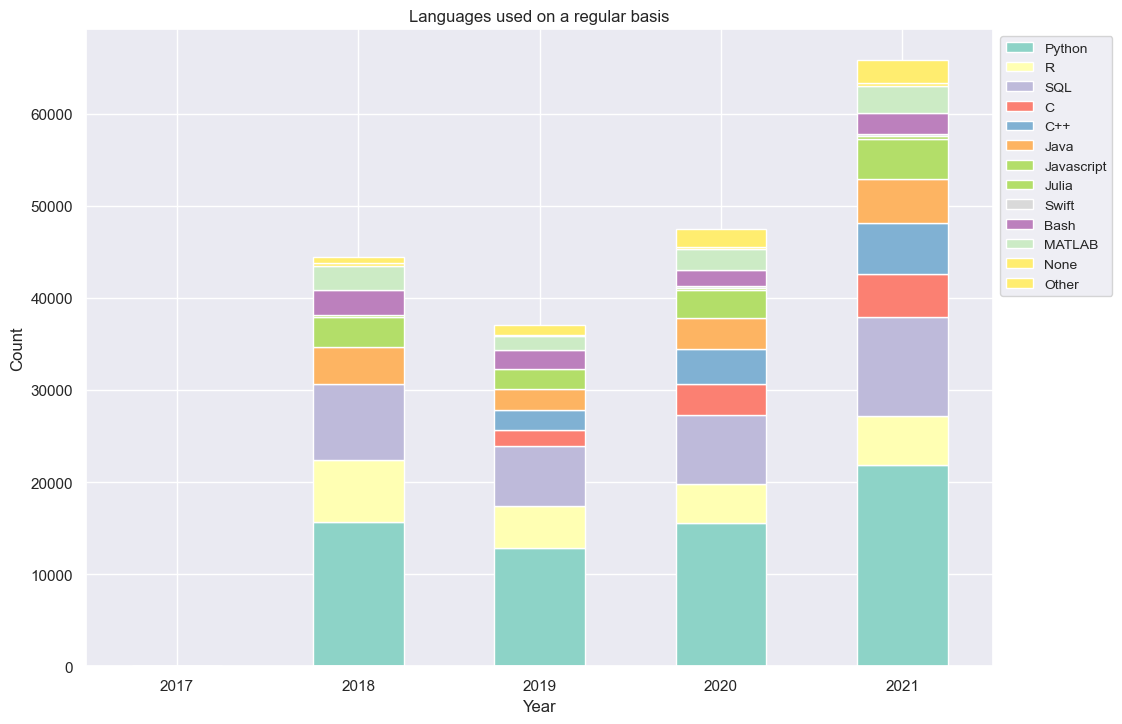

In [142]:
# What programming language do people use on a regular basis?
df_language = df[["Year","What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python",
                  "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other"]]

counts = df_language.groupby(['Year'])[["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python",
                  "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Bash",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - MATLAB",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None",
                 "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other"]].count()

sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})
# plot using seaborn
ax = counts.plot(kind='bar', stacked=True, colormap='Set3', rot=0)

plt.title("Languages used on a regular basis")
plt.xlabel('Year')
plt.ylabel('Count')

# Remove legend title
ax.legend_.set_title(None)
ax.legend(labels=['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

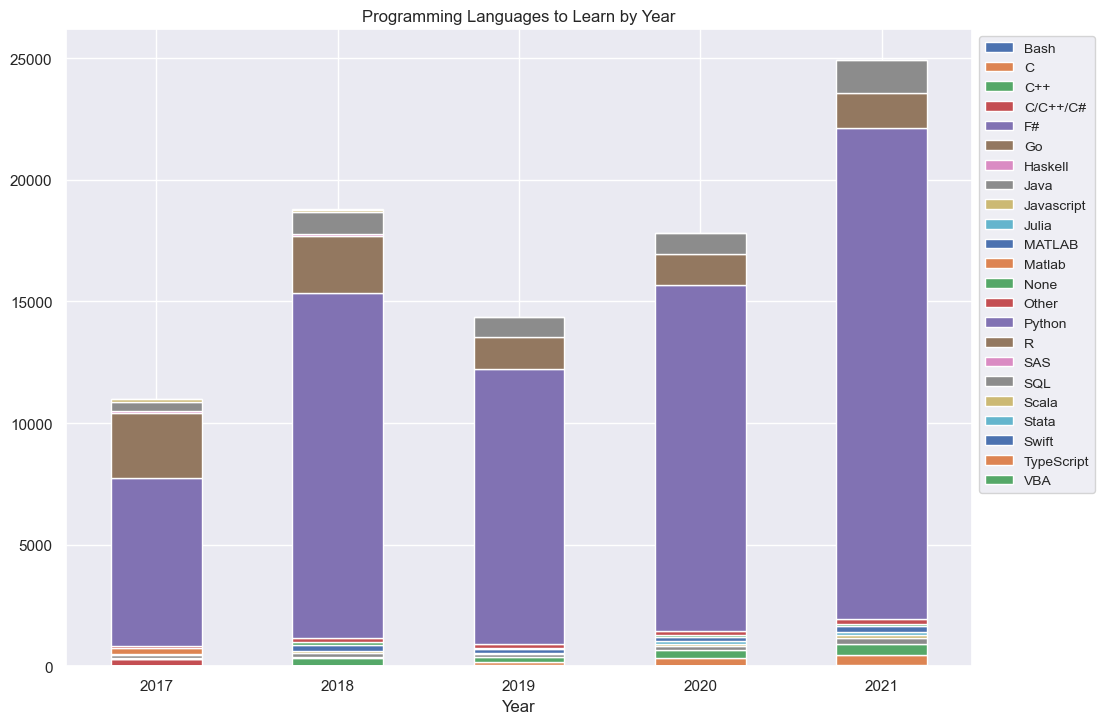

In [143]:
# What programming language would you recommend an aspiring data scientist to learn first?
# From 2017 to 2021, the number 1 language to learn first as an aspiring data scientist is Python. 
df_reco_lang = df[["Year", 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice']]
df_reco_lang_count = df_reco_lang.groupby(["Year",'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice']).size().reset_index(name='Count')

year_counts = df_reco_lang_count.groupby('Year')['Count'].sum().reset_index()
# Pivot to have 1 col for each language
year_counts_pivot = df_reco_lang_count.pivot(index='Year', columns='What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice', values='Count').fillna(0)

sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})
# plot using seaborn
ax = year_counts_pivot.plot(kind='bar', stacked=True, rot=0)

# add a title
ax.set_title('Programming Languages to Learn by Year')

# Remove legend title
ax.legend_.set_title(None)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# display the plot
plt.show()

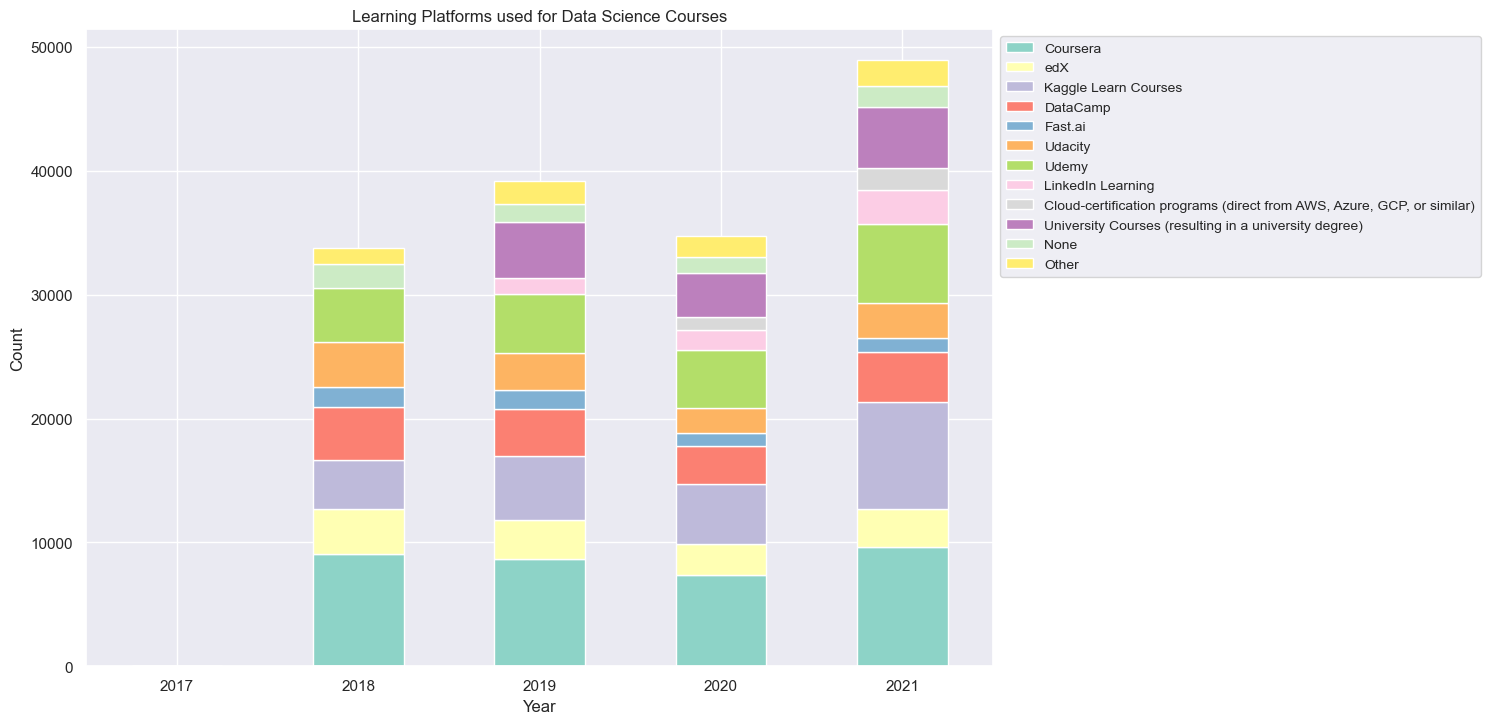

In [150]:
# On which platforms have people completed data science courses?
df_courses = df[["Year","On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera",
                  "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree)",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other"]]

courses_counts = df_courses.groupby(['Year'])[["On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera",
                  "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree)",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None",
                 "On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other"]].count()

sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})
# plot using seaborn
ax = courses_counts.plot(kind='bar', stacked=True, colormap='Set3', rot=0)

plt.title("Learning Platforms used for Data Science Courses")
plt.xlabel('Year')
plt.ylabel('Count')

# Remove legend title
ax.legend_.set_title(None)
ax.legend(labels=['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai', 'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)', 'University Courses (resulting in a university degree)', 'None', 'Other'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
#### This is to inform the management of the different platforms that people use to upgrade or learn data science skills
## To allow them to make the necessary procurement of licenses 

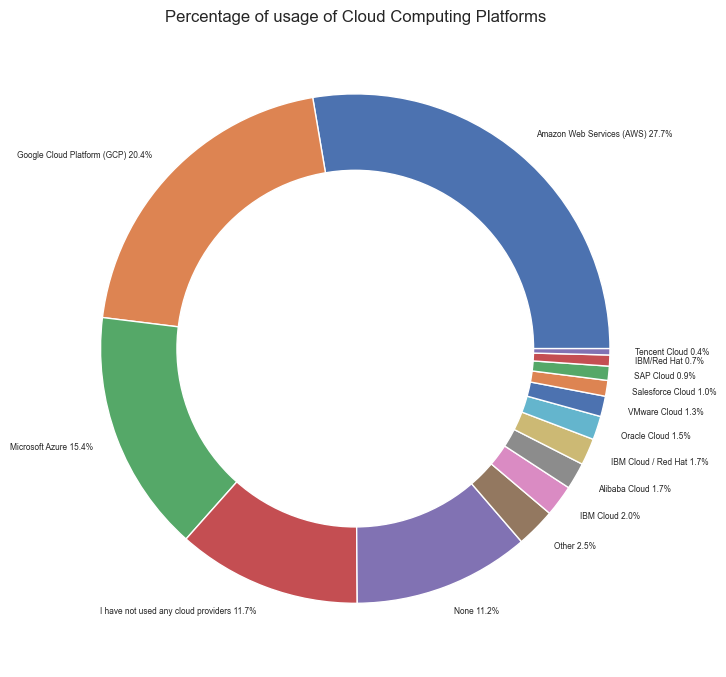

In [173]:
# Which cloud platform do you use on a regular basis?
df_cloud = df[["Year","Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) ",
                  "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Oracle Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  SAP Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Salesforce Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  VMware Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Alibaba Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud ",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - None",
                 "Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other"]]

# Remove white spaces
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS) '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Microsoft Azure '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  IBM Cloud / Red Hat '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Oracle Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Oracle Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  SAP Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  SAP Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Salesforce Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Salesforce Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  VMware Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  VMware Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Alibaba Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Alibaba Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud '] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Tencent Cloud '].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - None'] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - None'].str.strip()
df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'] = df_cloud['Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].str.strip()


courses_counts = df_cloud.melt(id_vars=["Year"], var_name='Question', value_name='Cloud')
courses_counts = courses_counts.Cloud.value_counts(normalize=True).mul(100).round(1).reset_index(name="Percentage (%)")
courses_counts['Course_percent'] = courses_counts["index"] + " " + courses_counts["Percentage (%)"].astype(str) + "%"

# Create a pieplot
plt.pie(courses_counts["Percentage (%)"], labels=courses_counts['Course_percent'], textprops={'fontsize': 6})
plt.title("Percentage of usage of Cloud Computing Platforms")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

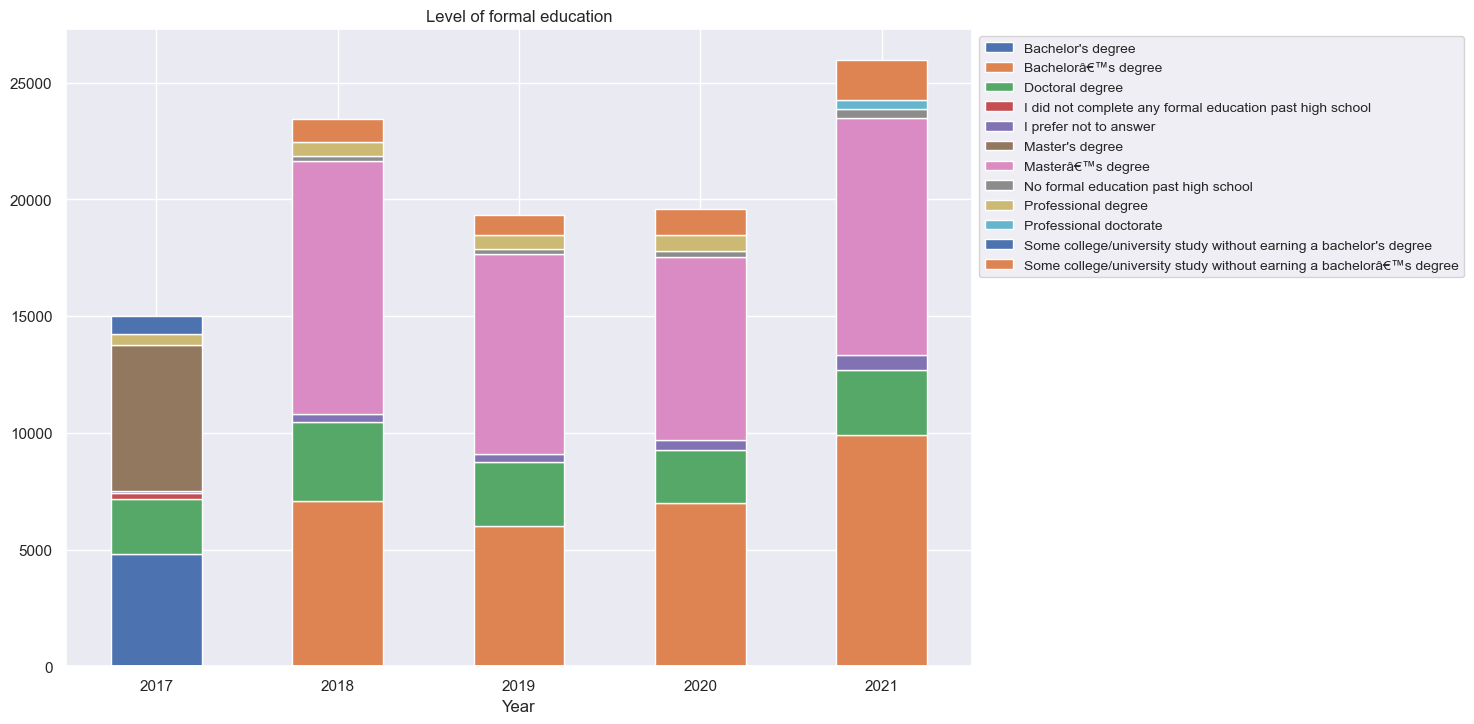

In [174]:
# What level of education that you have attained or plan to attain within the next 2 years

df_reco_lang = df[["Year", 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']]
df_reco_lang_count = df_reco_lang.groupby(["Year",'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']).size().reset_index(name='Count')

year_counts = df_reco_lang_count.groupby('Year')['Count'].sum().reset_index()
# Pivot to have 1 col for each language
year_counts_pivot = df_reco_lang_count.pivot(index='Year', columns='What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', values='Count').fillna(0)

sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})
# plot using seaborn
ax = year_counts_pivot.plot(kind='bar', stacked=True, rot=0)

# add a title
ax.set_title('Level of formal education')

# Remove legend title
ax.legend_.set_title(None)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# display the plot
plt.show()

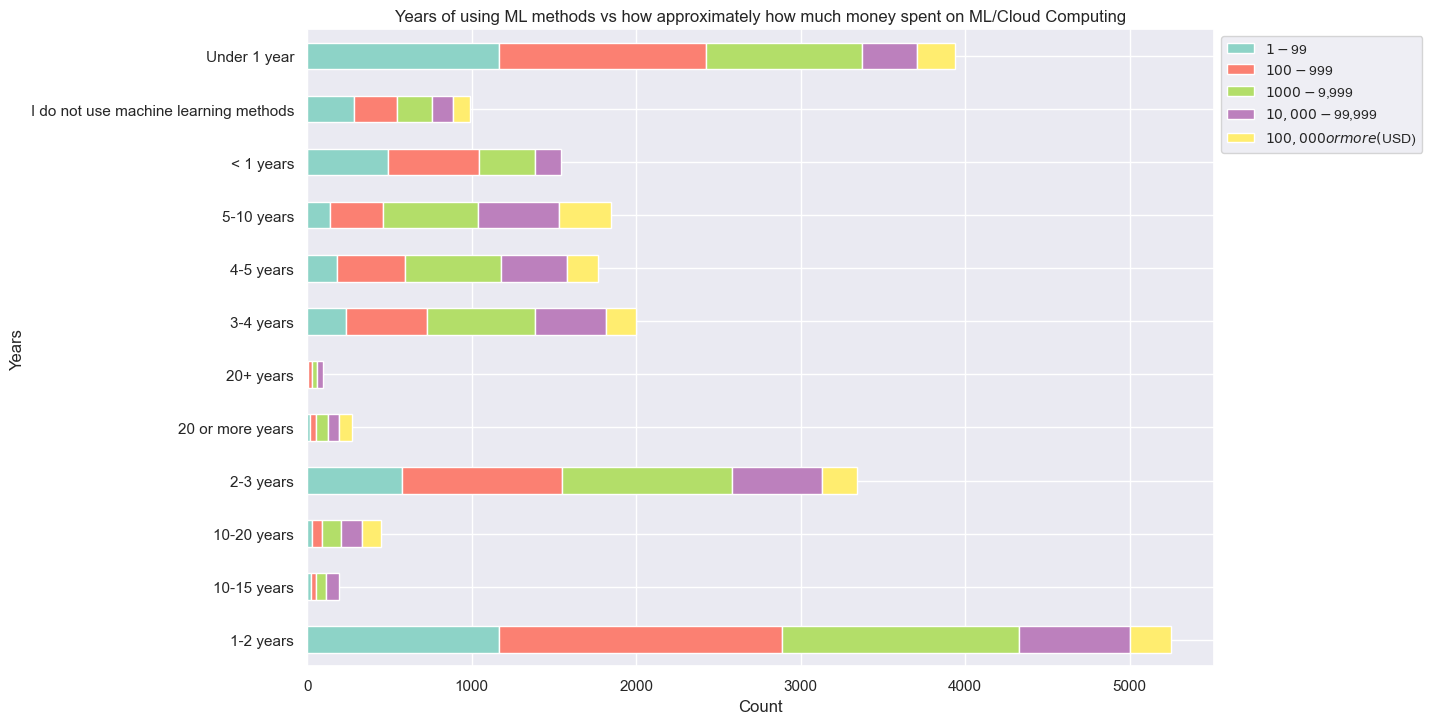

In [188]:
# Years of experience vs salary
years_of_exp_sal_df = df[['For how many years have you used machine learning methods?', 'Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?']]
crosstb = pd.crosstab(years_of_exp_sal_df['For how many years have you used machine learning methods?'], years_of_exp_sal_df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'])
crosstb = crosstb[['$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']]

sns.set(rc={'legend.fontsize': 10, 'figure.figsize':(11.7,8.27)})
# plot using seaborn
ax = crosstb.plot.barh(stacked=True, colormap='Set3', rot=0)

plt.title("Years of using ML methods vs how approximately how much money spent on ML/Cloud Computing")
plt.xlabel('Count')
plt.ylabel('Years')

# Remove legend title
ax.legend_.set_title(None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))